In [8]:
import numpy as np
import pandas as pd


In [10]:
df= pd.read_csv('spam.csv',encoding='latin1')

In [11]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
347,ham,One small prestige problem now.,NaN,NaN,NaN
4457,ham,Die... I accidentally deleted e msg i suppose ...,NaN,NaN,NaN
4608,ham,Y de asking like this.,NaN,NaN,NaN
849,spam,Today's Offer! Claim ur å£150 worth of discoun...,NaN,NaN,NaN
2691,ham,Hey tmr meet at bugis 930 ?,NaN,NaN,NaN


In [13]:
# whole process containning varoious steps includes
# 1. Data Cleaning 
# 2. EDA
# 3. Text Preprocessing
# 4. model building
# 5. Evaluation
# 6. Improvement 
# 7 . Website
# 8. deploy

## 1. Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'] ,inplace =True)

In [18]:
df.sample(5)

,v1,v2
1323,ham,I thk 50 shd be ok he said plus minus 10.. Did...
987,ham,"Geeee ... I miss you already, you know ? Your ..."
1681,ham,Y lei?
3795,ham,They have a thread on the wishlist section of ...
4895,ham,2 and half years i missed your friendship:-)


In [19]:
#renaming the columns 


In [31]:
df.head()

,spam/ham,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
df.rename(columns={'spam/ham':'Target', 'v2':'text'}, inplace=True)

In [35]:
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
pip install --upgrade scikit-learn


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 809.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
    --------------------------------------- 0.1/9.2 MB 3.5 MB/s eta 0:00:03
    --------------------------------------- 0.2/9.2 MB 3.1 MB/s eta 0:00:03
   - -------------------------------------- 0.4/9.2 MB 3.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/9.2 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.2 MB 4.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.2 MB 4.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.2 MB 4.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.2 MB 3.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.2/9.2 MB 3.1 MB/s eta 0:00:03
   ----- ------

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [50]:
df['Target']=encoder.fit_transform(df['Target'])

In [51]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df.isnull().sum()

Target    0
text      0
dtype: int64

In [54]:
#checking for the duplicate values
df.duplicated().sum()

403

In [55]:
df= df.drop_duplicates(keep='first')

In [57]:
df.shape

(5169, 2)

In [58]:
df.describe()

,Target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## EDA


In [61]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

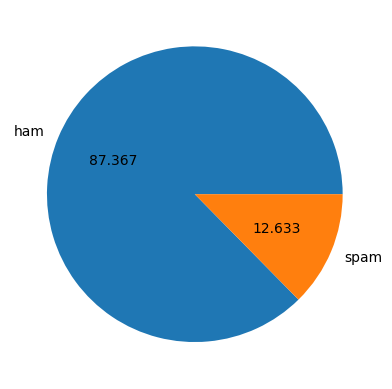

In [64]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'], autopct='%0.3f')
plt.show()

In [65]:
!pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.5 MB ? eta -:--:--
     --- ------------------------------------ 0.1/1.5 MB 1.2 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.5 MB 919.0 kB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.5 MB 919.0 kB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.5 MB 697.2 kB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.5 MB 697.2 kB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.5 MB 697.2 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.5 MB 518.8 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.5 MB 529.7 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.5 MB 529.7 kB/s eta 0:00:03
     ------ --------------------------------- 0.2/1.5 MB 480.3 kB/s e

In [66]:
import nltk

In [67]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [71]:
df.loc[:, 'characters'] = df['text'].apply(len)


In [72]:
df.head()

,Target,text,characters,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,111
1,0,Ok lar... Joking wif u oni...,29,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,0,U dun say so early hor... U c already then say...,49,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61


In [74]:
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [75]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19360\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [76]:
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [80]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [81]:
df.head()

,Target,text,num_characters,num_words,n um_sentences,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2
1,0,Ok lar... Joking wif u oni...,29,8,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2
3,0,U dun say so early hor... U c already then say...,49,13,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1


In [83]:
df.drop(columns=['n um_sentences'],inplace=True)

In [84]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [86]:
#It includes all messages ham or spam
df[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [90]:
# for brief info of ham messages only
df[df['Target']==0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [91]:
# for spam messages
df[df['Target']==1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [92]:
import seaborn as sns

C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


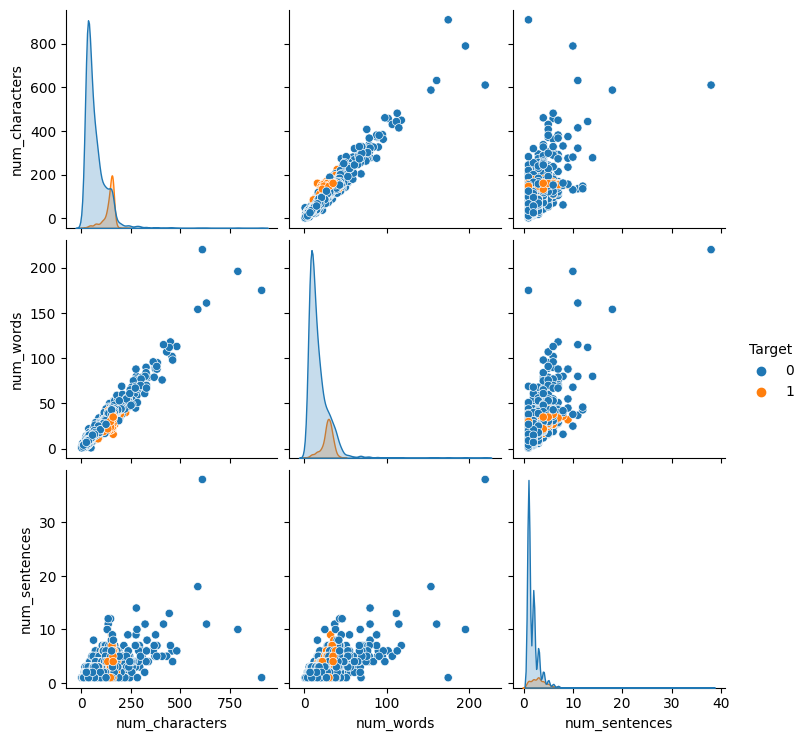

In [97]:
sns.pairplot(df,hue='Target')

In [99]:
# pierson correlation coefficient 
#In statistics, the Pearson correlation coefficient (PCC)[a] is a correlation coefficient that measures linear correlation between two sets of data.
#It is the ratio between the covariance of two variables and the product of their standard deviations; 
#thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1.


In [111]:
df['Target']=encoder.fit_transform(df['Target'])


In [113]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

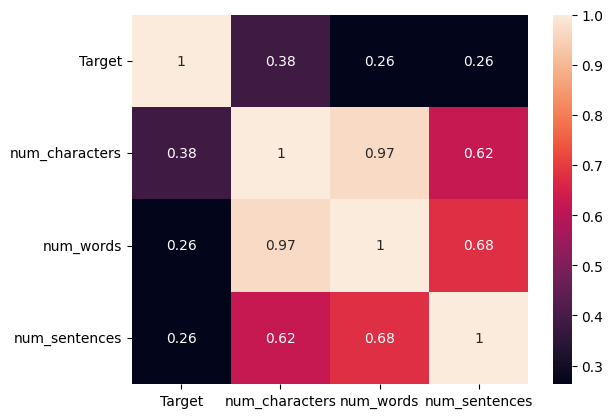

In [114]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_columns.corr(), annot=True)


## Data PreProcessing 


In [115]:
# Data preprocessing includes convert the data into the lower case, Tokenize it , remove stopWords , removing Special Characters 
# removing punctuations and stemming . stemming is like that the words reffers to the same leximate.

In [131]:
def operations_on_text(text):
    #converting text to the lowercase
    text=text.lower()
    # tokenize or cutting down the text into words using nltk 
    text=nltk.word_tokenize(text)
    # for removing the special characters
    y=[]
    for i in text :
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    
    

In [132]:

nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the English stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [133]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('Dancing')

'danc'

In [134]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [135]:
operations_on_text("Why are you dancing , are you mad")

'danc mad'

In [137]:
df['transformed_text']=df['text'].apply(operations_on_text)

In [138]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## wordcloud

In [140]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.2 kB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [141]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [143]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

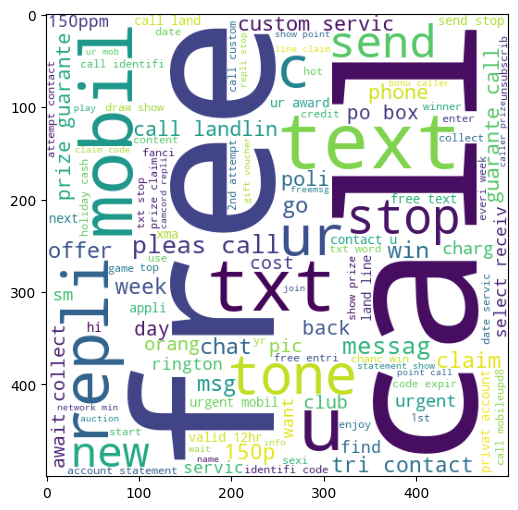

In [144]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [145]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

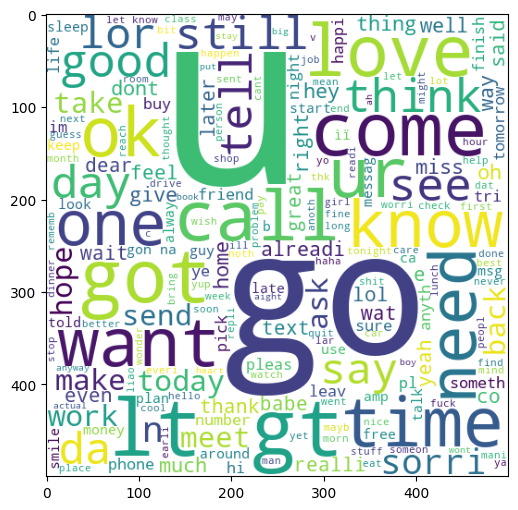

In [146]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [147]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [149]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [150]:
spam_corpus


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [151]:
len(spam_corpus)

9939

In [174]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [170]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [171]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [172]:
len(ham_corpus)

35404

In [173]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

## Model Building using ML Algorithms

In [182]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [183]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [184]:
X.shape

(5169, 3000)

In [185]:
y = df['Target'].values

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [188]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [191]:
# In above shell I goes to import the algorithms for trying best algorithm for the model's prediction
# Trying the algorithms based on precision and accuracy for checking the performance

In [194]:
# create an object

In [195]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [196]:
# gaussian naive based algo.

In [197]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [198]:
#multinomial naive bayes

In [199]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [200]:
#bernoulli naive bayes

In [201]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [202]:
# tfidf vectorization ->  better performance by MNB

In [203]:
# Trying another algorithms to improve precision of model 

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [205]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 0.4/99.8 MB 5.1 MB/s eta 0:00:20
   ---------------------------------------- 0.9/99.8 MB 6.8 MB/s eta 0:00:15
    --------------------------------------- 1.4/99.8 MB 7.8 MB/s eta 0:00:13
    --------------------------------------- 1.9/99.8 MB 8.6 MB/s eta 0:00:12
    --------------------------------------- 2.3/99.8 MB 8.7 MB/s eta 0:00:12
   - -------------------------------------- 2.7/99.8 MB 9.1 MB/s eta 0:00:11
   - -------------------------------------- 3.1/99.8 MB 9.1 MB/s eta 0:00:11
   - -------------------------------------- 3.5/99.8 MB 9.0 MB/s eta 0:00:11
   - -------------------------------------- 4.0/99.8 MB 9.1 MB/s eta 0:00:11
   - -------------------------------------- 4.3/99.8 MB 8.9 MB/s eta 0:00:11
   - -------------------------------------- 4.7/99.8 MB 8.8 MB/s eta 0:00:11
   -- 

In [208]:
# object creation

In [209]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [210]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [211]:
# defining the function which returns the accuracy and precision of the model using specific algorithm

In [212]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [213]:
#Example using Support vector machine
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [214]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [215]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [216]:
performance_df 

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [218]:
# here KN algorithm gives 100 percent pricision but NB also gives the 97% acuuracy with 100% precision 
# here this accuracy of NB as it uses the max features function

In [221]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [222]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


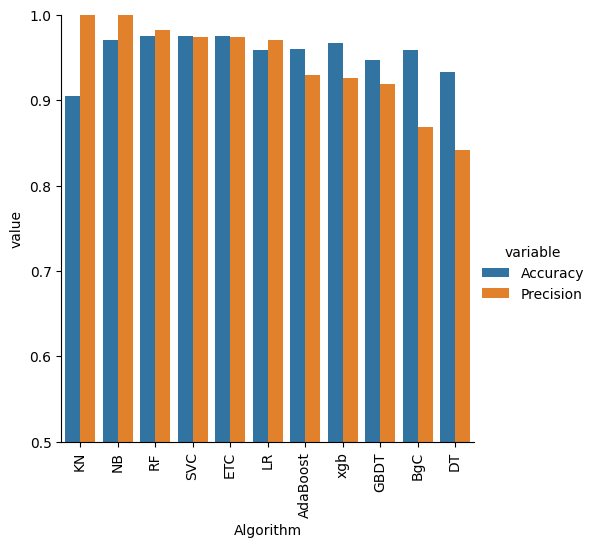

In [223]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [224]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))